<a href="https://colab.research.google.com/github/GoGnEt1/algorithms-and-data-structures/blob/main/GOUDJANOUSSI_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pandas numpy scikit-learn

In [7]:
import pandas as pd

data = {
    "Rank": [1, 2, 3],
    "Title": ["The Shawshank Redemption", "The Godfather", "The Dark Knight"],
    "Year": [1994, 1972, 2008],
    "Rating": [9.3, 9.2, 9.0]
}

df = pd.DataFrame(data)
df.to_csv("imdb_movies.csv", index=False)

print("File 'imdb_movies.csv' created successfully!")


File 'imdb_movies.csv' created successfully!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("imdb_movies.csv")

# Show first rows
print(df.head())


   Rank                     Title  Year  Rating
0     1  The Shawshank Redemption  1994     9.3
1     2             The Godfather  1972     9.2
2     3           The Dark Knight  2008     9.0


In [11]:
features = df[['Year', 'Rating']]

# Standardize features (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose number of clusters (k)
k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Show clustered data
print(df[['Title', 'Year', 'Rating', 'Cluster']])


                      Title  Year  Rating  Cluster
0  The Shawshank Redemption  1994     9.3        2
1             The Godfather  1972     9.2        0
2           The Dark Knight  2008     9.0        1


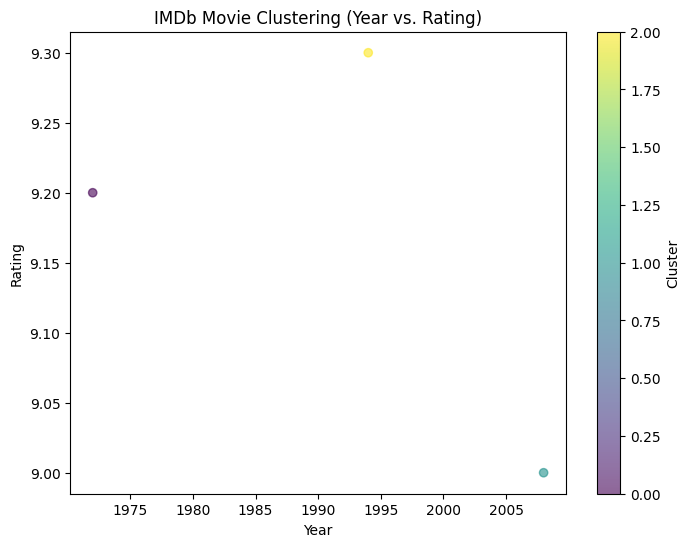

In [12]:
plt.figure(figsize=(8, 6))

# Scatter plot: Year vs Rating with Cluster Colors
plt.scatter(df['Year'], df['Rating'], c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("IMDb Movie Clustering (Year vs. Rating)")
plt.colorbar(label="Cluster")
plt.show()